In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
import hyperobjects as ho
from pycapacity.algorithms import iterative_convex_hull_method
from pycapacity.objects import Polytope
from pycapacity.visual import plot_polytope

Visual: no faces found, calculating faces
using provided 3d axis


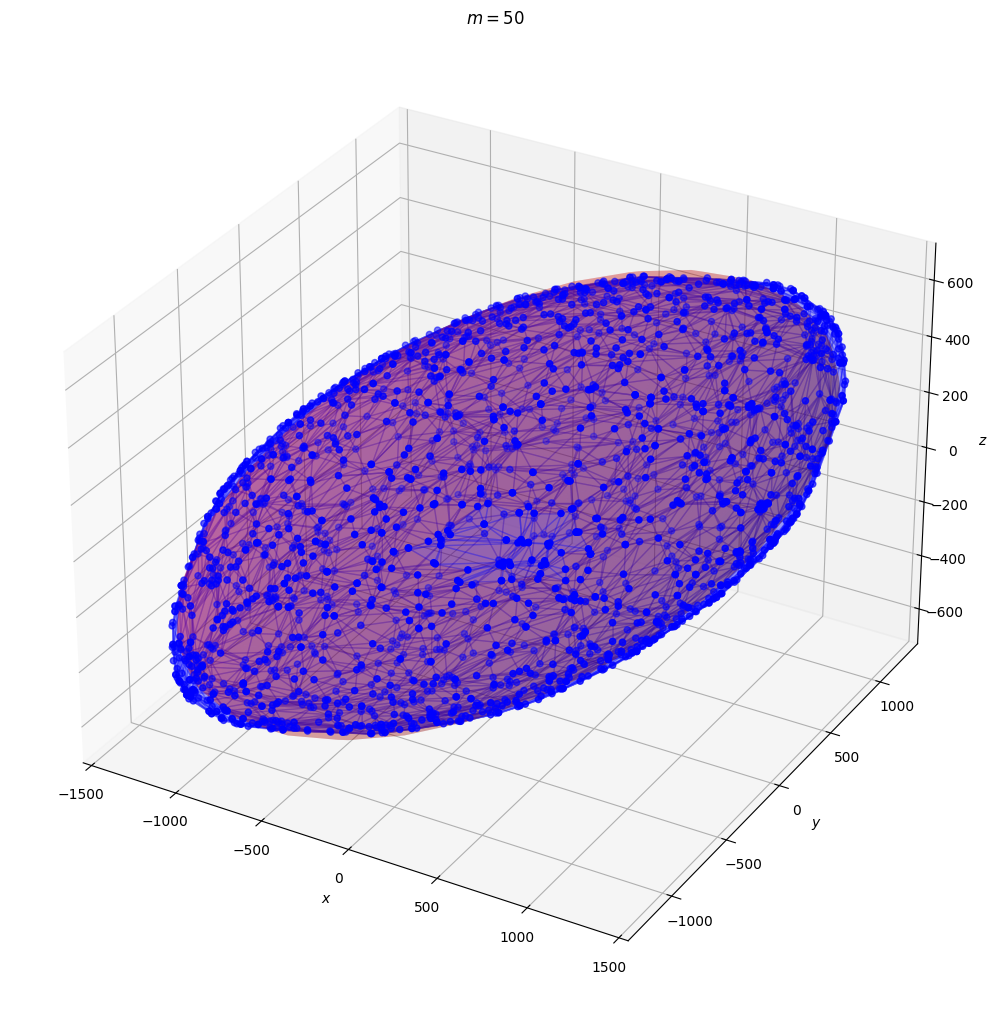

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(10,20))
# fig, ax = plt.subplots(1,3)
np.random.seed(40)

p, n, m = 3, 7, 50
J = np.random.uniform(-5,5, size=(p,n))
N = np.random.uniform(-1,1,size=(n,m))
t_min = -250*np.ones(m)
t_max = 250*np.ones(m)
# t_max = np.random.uniform(200, 500, size=m)

# -----------------------
ax = fig.add_subplot(111, projection='3d')
ax.set_title(r"$m = 50$")

res = iterative_convex_hull_method(J.T, N[:,:50], t_min[:50], t_max[:50], tol=0.01)
P = Polytope(vertices=res[0])
plot_polytope(P, ax, color="blue", alpha=0.2)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

# ax.set_xlim(-1000,1000)
# ax.set_ylim(-1000,1000)
# ax.set_zlim(-1000,1000)

E = np.linalg.pinv(J.T) @ (ho.AffineSpace(J.T) & (N @ (ho.radius_grunbaum(50) * ho.Sphere(m, r=250))))
E.plot(ax, color='red', alpha=0.2)
fig.tight_layout()
plt.show()

In [39]:
from timeit import default_timer



time_report = {
    "pol_small_tol": [],
    "pol_large_tol": [],
    "ell": []
}

for _ in range(200):
    p, n, m = 3, 7, 50
    J = np.random.uniform(-5,5, size=(p,n))
    N = np.random.uniform(-1,1,size=(n,m))
    t_min = -250*np.ones(m)
    t_max = 250*np.ones(m)
    
    START = default_timer()
    res = iterative_convex_hull_method(J.T, N[:,:50], t_min[:50], t_max[:50], tol=10)
    END = default_timer()
    print("Pol:", END - START)
    time_report["pol_small_tol"].append(END-START)


    START = default_timer()
    res = iterative_convex_hull_method(J.T, N[:,:50], t_min[:50], t_max[:50], tol=20)
    END = default_timer()
    print("Pol2:", END - START)
    time_report["pol_large_tol"].append(END-START)

    START = default_timer()
    E = np.linalg.pinv(J.T) @ (ho.AffineSpace(J.T) & (N @ (ho.radius_grunbaum(50) * ho.Sphere(m, r=250))))
    END = default_timer()
    print("Ell:", END - START)
    time_report["ell"].append(END-START)

print(time_report)

Pol: 0.48825660001602955
Pol2: 0.27162710000993684
Ell: 0.0015611000126227736
Pol: 0.4127925999928266
Pol2: 0.22652249998645857
Ell: 0.001202500017825514
Pol: 0.44699679999030195
Pol2: 0.25255430000834167
Ell: 0.001375499996356666
Pol: 0.49812089998158626
Pol2: 0.27982619998510927
Ell: 0.0012769999739248306
Pol: 0.4826808999932837
Pol2: 0.2586508000094909
Ell: 0.0013146999990567565
Pol: 0.442917700012913
Pol2: 0.23352830001385882
Ell: 0.001705500006210059
Pol: 0.49381920002633706
Pol2: 0.27313849999336526
Ell: 0.0013096000184305012
Pol: 0.5331338999967556
Pol2: 0.32920460001332685
Ell: 0.001552600006107241
Pol: 0.5339816999912728
Pol2: 0.3276758999854792
Ell: 0.0013543000095523894
Pol: 0.46291020000353456
Pol2: 0.28479460001108237
Ell: 0.0013784999900963157
Pol: 0.43850439999368973
Pol2: 0.26615060001495294
Ell: 0.0013959999778307974
Pol: 0.38087419999646954
Pol2: 0.20742849999805912
Ell: 0.0011420999944675714
Pol: 0.46879210000042804
Pol2: 0.2786701000004541
Ell: 0.0014130000199656934

In [40]:
print((np.mean(time_report["pol_small_tol"])*1000).round(2)) # tol = 10
print((np.mean(time_report["pol_large_tol"])*1000).round(2)) # tol = 20
print((np.mean(time_report["ell"])*1000).round(2))

496.48
278.52
1.41


In [41]:
print((np.std(time_report["pol_small_tol"])*1000).round(2)) # tol = 10
print((np.std(time_report["pol_large_tol"])*1000).round(2)) # tol = 20
print((np.std(time_report["ell"])*1000).round(2))

59.47
43.77
0.18
